## Test notebook for pulses.py module

In [1]:
import numpy as np
from numpy.fft import fft, ifft, fftshift, fftfreq
import matplotlib.pyplot as plt
import time
import scipy
import copy
from matplotlib import cm
from matplotlib.colors import Normalize

#This are my libraries
import pulses
from util import sech

In [2]:
from scipy.constants import pi, c

## Test pulse creation

In [3]:
NFFT = 2**8 #Number of FFT points

Tmax = 500*1e-15 # (window will go from -Tmax to Tmax)
t = np.linspace(-Tmax, Tmax, NFFT, endpoint=False)
dt = t[1]-t[0] #Sampling period
print('Sampling Rate = %0.3f fs' %(dt*1e15))

#Parameters
wl0 = 1e-6 #center wavelength
f0 = c/wl0
print('Center Wavelength = %0.3f um' %(wl0*1e6))
print('Center frequency = %0.3f THz' %(f0*1e-12))
 
pulse_energy = 1e-9 #Pulse energy
tau = 100e-15 #Pulse width

#Pulse creation
Tp = tau/1.76
frep = 250e6
x = np.sqrt(0.88*pulse_energy/tau)*sech(t/Tp)
pulse_energy = pulses.energy_td(t, x)

print('Pulse Energy = %0.3f nJ' %(pulse_energy*1e9))
print('Pulse peak power = %0.3f kW' %(pulse_energy/tau*1e-3))
print('Comb average power = %0.3f mW' %(pulse_energy*frep*1e3))

Sampling Rate = 3.906 fs
Center Wavelength = 1.000 um
Center frequency = 299.792 THz
Pulse Energy = 1.000 nJ
Pulse peak power = 10.000 kW
Comb average power = 250.000 mW


## Plotting functions test

In [4]:
#Let's start by re-scaling the time
t = t*1e15

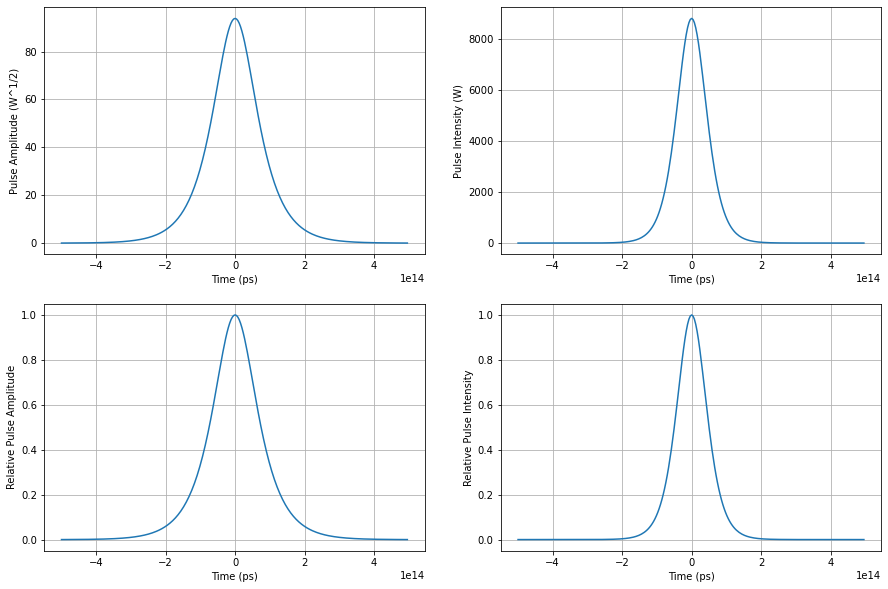

In [5]:
plt.rcParams['figure.figsize'] = [15, 10] # Change size of plots

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

pulses.plot_mag(t, x, ax=ax1, t_unit='ps');
pulses.plot_magsq(t, x, ax=ax2, t_unit='ps');
pulses.plot_mag_relative(t, x, ax=ax3, t_unit='ps');
pulses.plot_magsq_relative(t, x, ax=ax4, t_unit='ps');

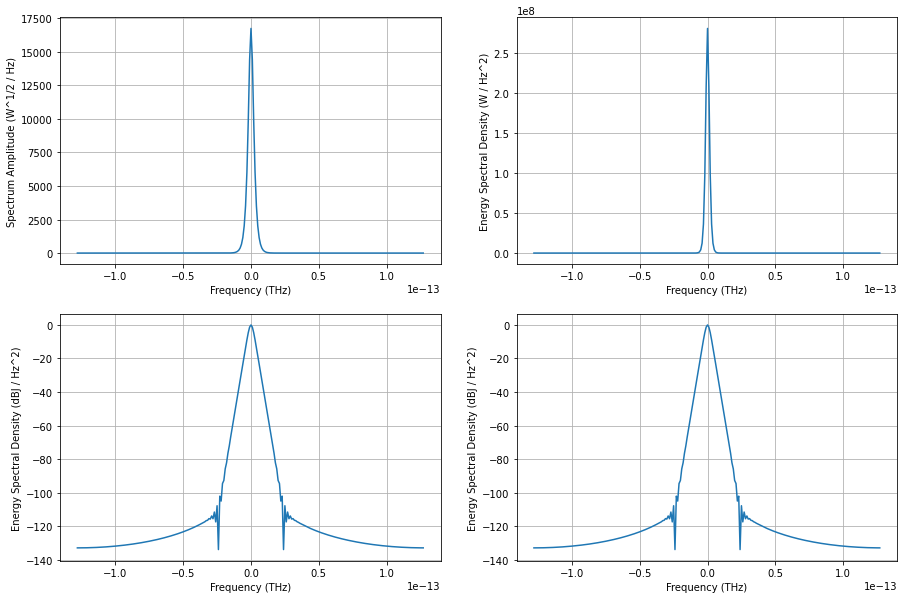

In [6]:
plt.rcParams['figure.figsize'] = [15, 10] # Change size of plots

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

pulses.plot_spectrum(t, x, ax=ax1, f_unit='THz');
pulses.plot_ESD(t, x, ax=ax2, f_unit='THz');
pulses.plot_ESD_dB(t, x, ax=ax3, f_unit='THz');
pulses.plot_ESD_dB(t, x, ax=ax4, f_unit='THz')

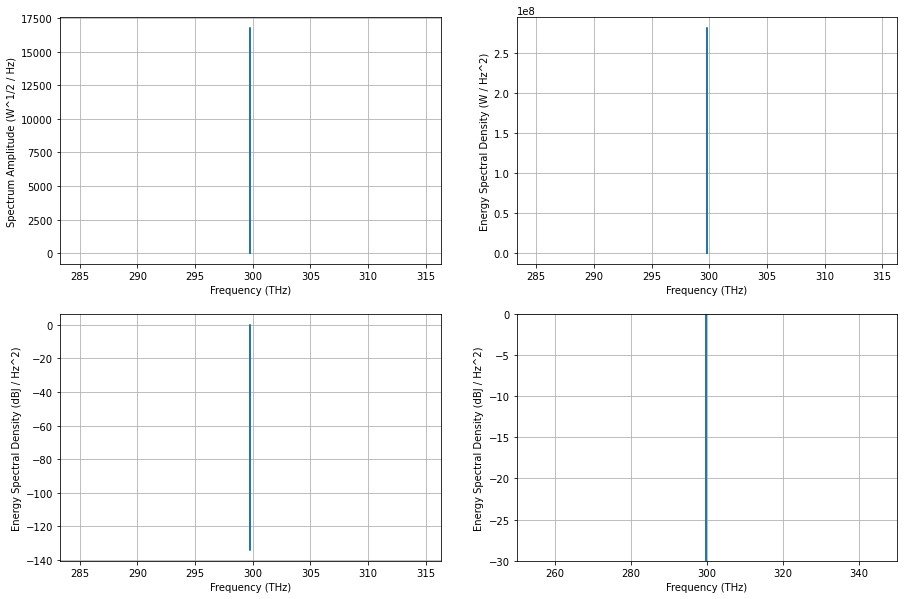

In [7]:
plt.rcParams['figure.figsize'] = [15, 10] # Change size of plots

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

pulses.plot_spectrum_absfreq(t, x, f0, ax=ax1, f_unit='THz');
pulses.plot_ESD_absfreq(t, x, f0, ax=ax2);
pulses.plot_ESD_dB_absfreq(t, x, f0, ax=ax3);
pulses.plot_ESD_dB_absfreq(t, x, f0, ax=ax4, xlim=[250,350], ylim=[-30,0]);

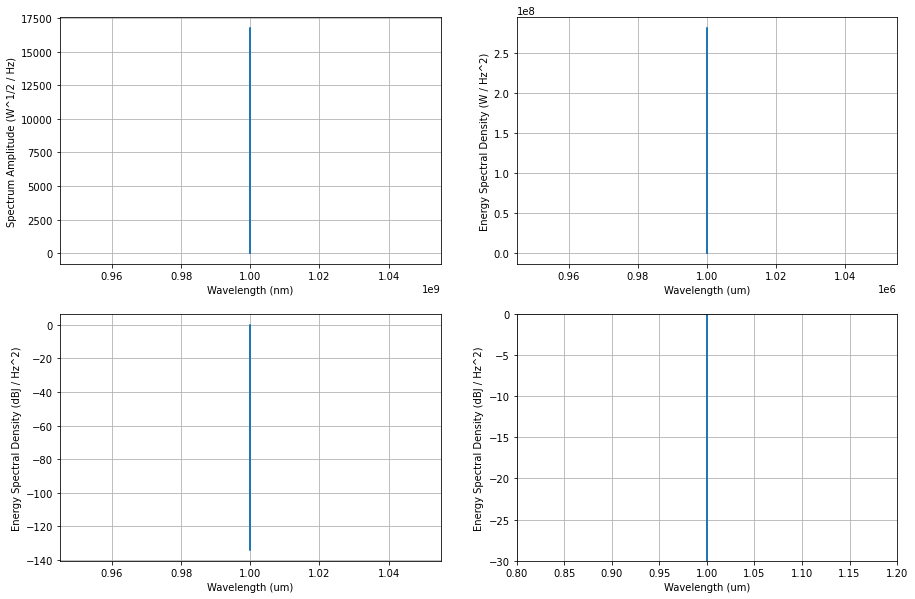

In [8]:
plt.rcParams['figure.figsize'] = [15, 10] # Change size of plots

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

pulses.plot_spectrum_vs_wavelength(t, x, f0, ax=ax1, wl_unit='nm');
pulses.plot_ESD_vs_wavelength(t, x, f0, ax=ax2, wl_unit='um');
pulses.plot_ESD_dB_vs_wavelength(t, x, f0, ax=ax3, wl_unit='um');
pulses.plot_ESD_dB_vs_wavelength(t, x, f0, ax=ax4, xlim=[0.8,1.2], ylim=[-30,0], wl_unit='um');

## Check energy calculation functions

In [9]:
print(format(pulses.energy_td(t, x)*1e9, '0.3e'), 'nJ')
print(format(pulses.energy_fd(t, x)*1e9, '0.3e'), 'nJ')

1.000e+15 nJ
1.000e+15 nJ


# Now, let's re-check all this using the pulse class

In [10]:
pulse = pulses.pulse(t, x, wl0*1e3)

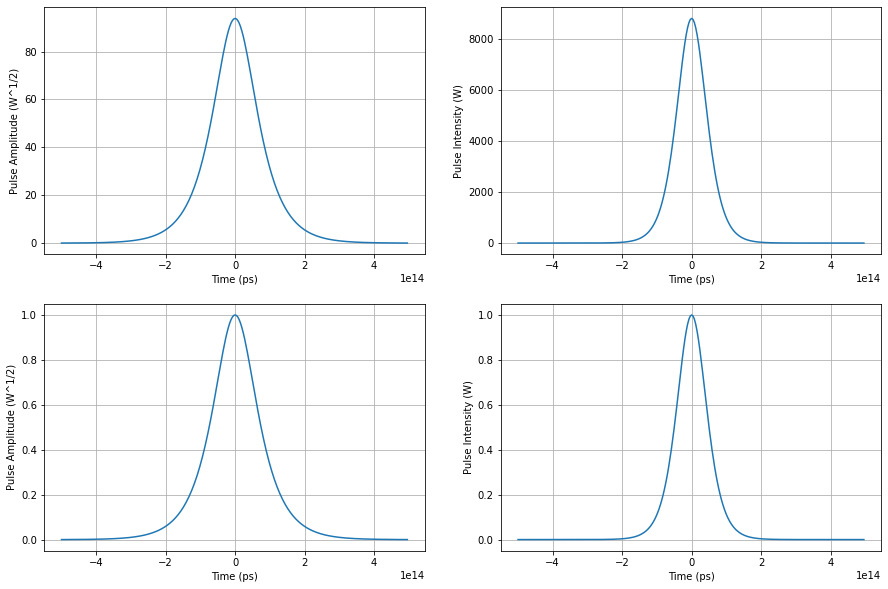

In [11]:
plt.rcParams['figure.figsize'] = [15, 10] # Change size of plots

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

pulse.plot_mag(ax=ax1);
pulse.plot_magsq(ax=ax2);
pulse.plot_mag_relative(ax=ax3);
pulse.plot_magsq_relative(ax=ax4);

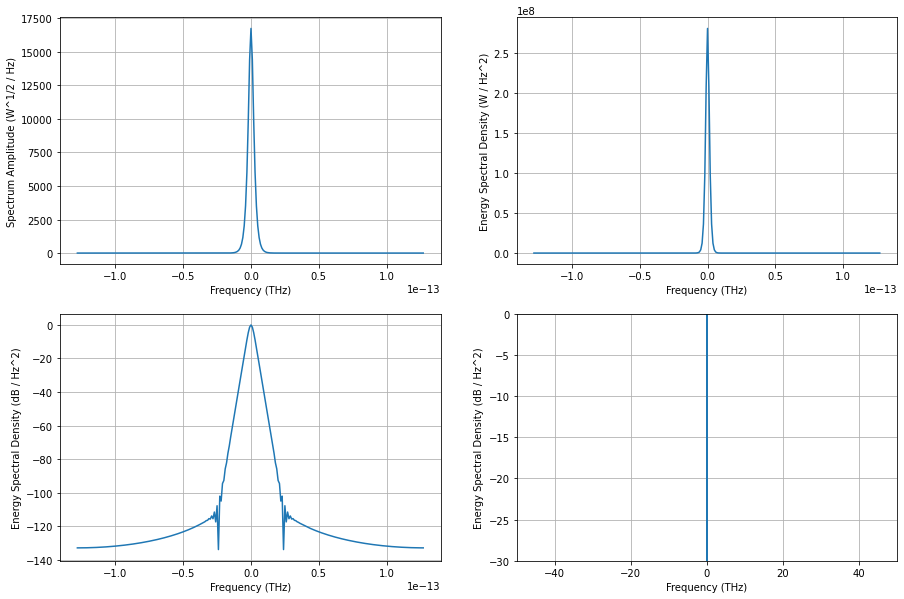

In [12]:
plt.rcParams['figure.figsize'] = [15, 10] # Change size of plots

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

pulse.plot_spectrum(ax=ax1);
pulse.plot_ESD(ax=ax2);
pulse.plot_ESD_dB(ax=ax3);
pulse.plot_ESD_dB(ax=ax4, xlim=[-50,50], ylim=[-30,0]);

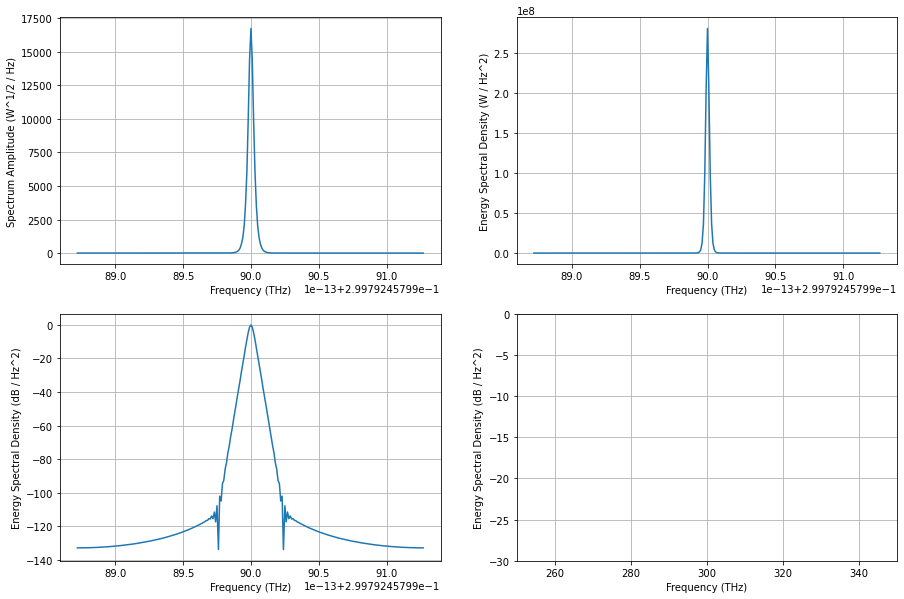

In [13]:
plt.rcParams['figure.figsize'] = [15, 10] # Change size of plots

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

pulse.plot_spectrum_absfreq(ax=ax1);
pulse.plot_ESD_absfreq(ax=ax2);
pulse.plot_ESD_dB_absfreq(ax=ax3);
pulse.plot_ESD_dB_absfreq(ax=ax4, xlim=[250,350], ylim=[-30,0]);

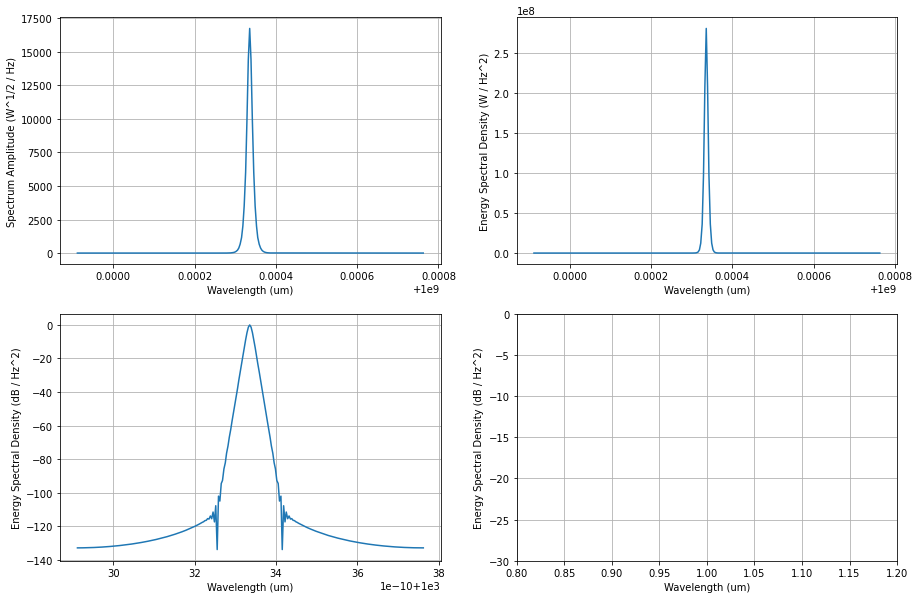

In [14]:
plt.rcParams['figure.figsize'] = [15, 10] # Change size of plots

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

pulse.plot_spectrum_vs_wavelength(ax=ax1);
pulse.plot_ESD_vs_wavelength(ax=ax2);
pulse.plot_ESD_dB_vs_wavelength(ax=ax3);
pulse.plot_ESD_dB_vs_wavelength(ax=ax4, xlim=[0.8,1.2], ylim=[-30,0]);

In [15]:
print(format(pulse.energy_td()*1e9, '0.3e'), 'nJ')
print(format(pulse.energy_fd()*1e9, '0.3e'), 'nJ')

1.000e+15 nJ
1.000e+15 nJ
